2022-01-14 15:00:47.608 INFO    numexpr.utils: NumExpr defaulting to 8 threads.
2022-01-14 15:00:48.801 
  command:

    streamlit run /opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


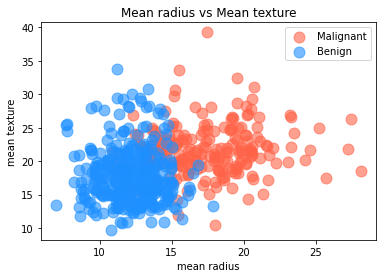

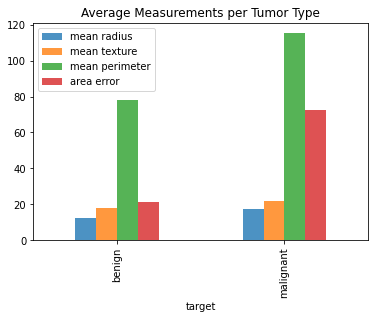

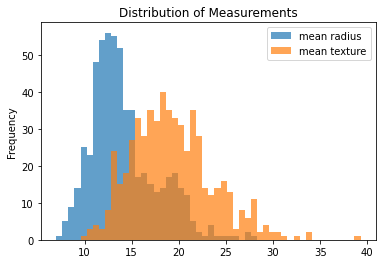

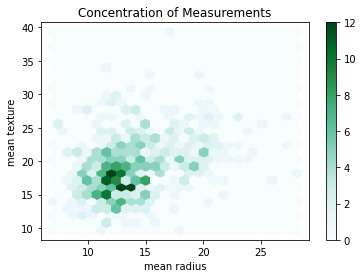

In [1]:
import streamlit as st

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

####### Load Dataset #####################

breast_cancer = datasets.load_breast_cancer(as_frame=True)

breast_cancer_df = pd.concat((breast_cancer["data"], breast_cancer["target"]), axis=1)

breast_cancer_df["target"] = [breast_cancer.target_names[val] for val in breast_cancer_df["target"]]

########################################################

st.set_page_config(layout="wide")

st.markdown("## Breast Cancer Dataset Analysis")   ## Main Title

################# Scatter Chart Logic #################

st.sidebar.markdown("### Scatter Chart: Explore Relationship Between Measurements :")

measurements = breast_cancer_df.drop(labels=["target"], axis=1).columns.tolist()

x_axis = st.sidebar.selectbox("X-Axis", measurements)
y_axis = st.sidebar.selectbox("Y-Axis", measurements, index=1)

if x_axis and y_axis:
    scatter_fig = plt.figure(figsize=(6,4))

    scatter_ax = scatter_fig.add_subplot(111)

    malignant_df = breast_cancer_df[breast_cancer_df["target"] == "malignant"]
    benign_df = breast_cancer_df[breast_cancer_df["target"] == "benign"]

    malignant_df.plot.scatter(x=x_axis, y=y_axis, s=120, c="tomato", alpha=0.6, ax=scatter_ax, label="Malignant")
    benign_df.plot.scatter(x=x_axis, y=y_axis, s=120, c="dodgerblue", alpha=0.6, ax=scatter_ax,
                           title="{} vs {}".format(x_axis.capitalize(), y_axis.capitalize()), label="Benign");




########## Bar Chart Logic ##################

st.sidebar.markdown("### Bar Chart: Average Measurements Per Tumor Type : ")

avg_breast_cancer_df = breast_cancer_df.groupby("target").mean()
bar_axis = st.sidebar.multiselect(label="Average Measures per Tumor Type Bar Chart",
                                  options=measurements,
                                  default=["mean radius","mean texture", "mean perimeter", "area error"])

if bar_axis:
    bar_fig = plt.figure(figsize=(6,4))

    bar_ax = bar_fig.add_subplot(111)

    sub_avg_breast_cancer_df = avg_breast_cancer_df[bar_axis]

    sub_avg_breast_cancer_df.plot.bar(alpha=0.8, ax=bar_ax, title="Average Measurements per Tumor Type");

else:
    bar_fig = plt.figure(figsize=(6,4))

    bar_ax = bar_fig.add_subplot(111)

    sub_avg_breast_cancer_df = avg_breast_cancer_df[["mean radius", "mean texture", "mean perimeter", "area error"]]

    sub_avg_breast_cancer_df.plot.bar(alpha=0.8, ax=bar_ax, title="Average Measurements per Tumor Type");

################# Histogram Logic ########################

st.sidebar.markdown("### Histogram: Explore Distribution of Measurements : ")

hist_axis = st.sidebar.multiselect(label="Histogram Ingredient", options=measurements, default=["mean radius", "mean texture"])
bins = st.sidebar.radio(label="Bins :", options=[10,20,30,40,50], index=4)

if hist_axis:
    hist_fig = plt.figure(figsize=(6,4))

    hist_ax = hist_fig.add_subplot(111)

    sub_breast_cancer_df = breast_cancer_df[hist_axis]

    sub_breast_cancer_df.plot.hist(bins=bins, alpha=0.7, ax=hist_ax, title="Distribution of Measurements");
else:
    hist_fig = plt.figure(figsize=(6,4))

    hist_ax = hist_fig.add_subplot(111)

    sub_breast_cancer_df = breast_cancer_df[["mean radius", "mean texture"]]

    sub_breast_cancer_df.plot.hist(bins=bins, alpha=0.7, ax=hist_ax, title="Distribution of Measurements");

#################### Hexbin Chart Logic ##################################

st.sidebar.markdown("### Hexbin Chart: Explore Concentration of Measurements :")

hexbin_x_axis = st.sidebar.selectbox("Hexbin-X-Axis", measurements, index=0)
hexbin_y_axis = st.sidebar.selectbox("Hexbin-Y-Axis", measurements, index=1)

if hexbin_x_axis and hexbin_y_axis:
    hexbin_fig = plt.figure(figsize=(6,4))

    hexbin_ax = hexbin_fig.add_subplot(111)

    breast_cancer_df.plot.hexbin(x=hexbin_x_axis, y=hexbin_y_axis,
                                 reduce_C_function=np.mean,
                                 gridsize=25,
                                 #cmap="Greens",
                                 ax=hexbin_ax, title="Concentration of Measurements");

##################### Layout Application ##################

container1 = st.container()
col1, col2 = st.columns(2)

with container1:
    with col1:
        scatter_fig
    with col2:
        bar_fig


container2 = st.container()
col3, col4 = st.columns(2)

with container2:
    with col3:
        hist_fig
    with col4:
        hexbin_fig